In [22]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import torch
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import torch_geometric.transforms as T
from torch_geometric.datasets import IMDB
import matplotlib.pyplot as plt

## IMDB

In [23]:
dataset = IMDB(root='./imdb_data')
data = dataset[0]
movie = data['movie'].x.tolist()
df = pd.DataFrame(movie)
df['class'] = data['movie'].y.tolist()

In [24]:
def get_selected_features(X):
    col_sum = X.sum(axis=0)
    sorted_colsum = sorted(col_sum, reverse=True)
    colsum_df = pd.DataFrame(col_sum)
    
    sorted_colsum = sorted(col_sum, reverse=True)[:5]
    index_list = list(np.ravel(colsum_df[colsum_df[0].isin(sorted_colsum)].index))
    
    imp_feat = X[index_list]
    #imp_feat = imp_feat.drop(imp_feat[imp_feat.sum(axis=1) == 0.0].index)

    return imp_feat

Feature selection from Bag-of-Words features of Movie node

In [25]:
# Feature selection for Movie class 0
class0 = df[df['class'] == 0].drop(['class'], axis=1)
X = class0
imp_feat0 = get_selected_features(class0)
imp_feat0.head()

,1023,1381,1928,2095,2746
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [26]:
# Feature selection for Movie class 1
class1 = df[df['class'] == 1].drop(['class'], axis=1)
X = class1
imp_feat1 = get_selected_features(class1)
imp_feat1.head()

,1023,1111,1381,1624,2774
6,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,1.0,0.0,0.0
34,0.0,1.0,0.0,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0


In [27]:
# Feature selection for Movie class 2
class2 = df[df['class'] == 2].drop(['class'], axis=1)
X = class2
imp_feat2 = get_selected_features(class2)
imp_feat2.head()

,747,1023,1624,1654,1900
21,0.0,0.0,1.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0


### Features of each class of Movie node sampled using Diffusion Models

In [28]:
class_path = '../../../../../../graph generator/diffusion models/sampled_features_diffusion/dependence/DiTabDDPM/imdb/frequency/'

In [29]:
sampled0  = pd.DataFrame(torch.load(class_path + 'movie0_5feat.pt').cpu().numpy())
sampled0.head()

,0,1,2,3,4
0,0,1,2,5,0
1,0,0,0,1,5
2,2,5,0,1,1
3,4,1,0,0,0
4,0,0,3,0,0


In [30]:
sampled1  = pd.DataFrame(torch.load(class_path + 'movie1_5feat.pt').cpu().numpy())
sampled1.head()

,0,1,2,3,4
0,0,1,5,3,5
1,0,3,0,0,1
2,0,2,4,0,2
3,4,5,5,0,3
4,5,5,4,0,0


In [31]:
sampled2  = pd.DataFrame(torch.load(class_path + 'movie2_5feat.pt').cpu().numpy())
sampled2.head()

,0,1,2,3,4
0,3,0,5,4,4
1,0,5,0,5,0
2,0,2,1,4,3
3,0,0,5,0,0
4,4,0,0,0,1


In [32]:
def cosine_sim(original,sampled):
    return cosine_similarity(original, sampled)

### Pairwise cosine similarity of all features for real and synthetic distributions

Movie class 0

In [33]:
real_class0= np.array(imp_feat0)
cosine_sim(real_class0,sampled0)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12909944, 0.69337525, 0.76200076, ..., 0.5547002 , 0.66666667,
        0.63245553],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

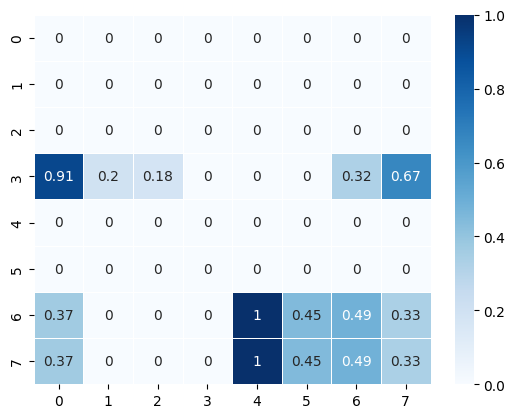

In [34]:
sns.heatmap(cosine_sim(real_class0[:8],sampled0[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [35]:
avg_cossim_class0 = np.mean(cosine_sim(real_class0,sampled0))
avg_cossim_class0

0.06631744392882795

Movie class 1

In [36]:
real_class1= np.array(imp_feat1)
cosine_sim(real_class1,sampled1)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.64549722, 0.        , 0.81649658, ..., 0.        , 0.        ,
        0.4472136 ],
       [0.12909944, 0.9486833 , 0.40824829, ..., 0.        , 0.        ,
        0.89442719],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

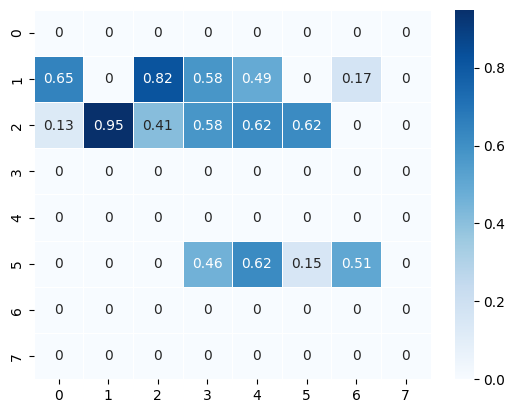

In [37]:
sns.heatmap(cosine_sim(real_class1[:8],sampled1[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [38]:
avg_cossim_class1 = np.mean(cosine_sim(real_class1,sampled1))
avg_cossim_class1

0.09441612253100092

Movie class 2

In [39]:
real_class2= np.array(imp_feat2)
cosine_sim(real_class2,sampled2)

array([[0.61545745, 0.        , 0.18257419, ..., 0.75377836, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

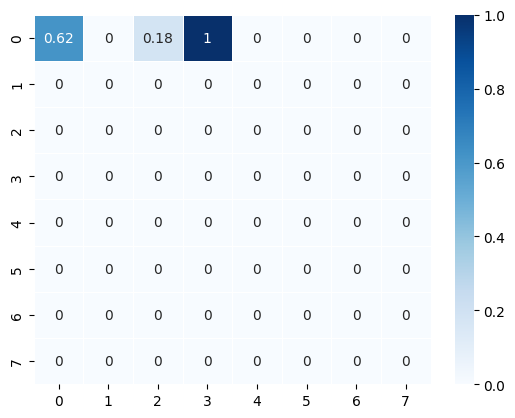

In [40]:
sns.heatmap(cosine_sim(real_class2[:8],sampled2[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [41]:
avg_cossim_class2 = np.mean(cosine_sim(real_class2,sampled2))
avg_cossim_class2

0.0661640414120669

In [42]:
(avg_cossim_class0 + avg_cossim_class1 +avg_cossim_class2)/3

0.07563253595729859